# Flights in Brazil

This work consists of an analysis of the graph of all flights registered by ANAC (Agência Nacional de Aviação Civil - National Civil Aviation Agency) as part of the unit grade of the Algorithms and Data Structures II discipline at the Federal University of Rio Grande do Sul. Norte, taught by [Ivanovitch Silva](https://github.com/ivanovitchm). The data was obtained from [Avaro's Github](https://github.com/alvarofpp/dataset-flights-brazil) repository.

## Setup

In [ ]:
!pip install nxviz=='0.6.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 24.2 MB/s 
     |████████████████████████████████| 965 kB 79.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!pip install geocoder==1.38.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 4.0 MB/s 


In [15]:
# import usefull packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nxviz as nv
import seaborn as sns

## <span style="color:red">IMPORTANT:</span> doesn't need to run these cells again

these cells show how to extract files and turn them into a graphml file as Alvaro shows in his repository. Here, I run the steps and generate a graphml filename `air_traffic_brazil` for our purposes. In addition, I made a small modification to the `transform_to_graphml.py` file adding the following line: `region=row['region']` to get Brazil's regions for each node. So you can simply import this file from the Github repository and skip this section.

In [ ]:
!python extract.py

100% 23/23 [06:48<00:00, 17.76s/it]


In [ ]:
!python transform_to_anac_csv.py

transform_to_anac_csv.py:7: DtypeWarning: Columns (24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.
  combined_csv = pd.concat([pd.read_csv(file, sep=';', encoding='ISO-8859-1') for file in files])


In [ ]:
!python transform_to_airports_csv.py

In [ ]:
!python transform_to_graphml.py

sys:1: DtypeWarning: Columns (24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
G = nx.read_graphml('data/air_traffic.graphml')

In [ ]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1115 nodes and 9975 edges


In [ ]:
# Just look how the nodes are represented in the Network
G.nodes(data=True)

NodeDataView({'KAUS': {'name': 'AUSTIN, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'latitude': 30.194499969482425, 'longitude': -97.6698989868164}, 'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'latitude': 32.896801, 'longitude': -97.038002}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'latitude': 40.639801, 'longitude': -73.7789}, 'KMCO': {'name': 'ORLANDO, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'latitude': 28.429399490356445, 'longitude': -81.30899810791016}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'latitude': 25.79319953918457, 'longitude': -80.29060363769531}, 'SBBR': {'name': 'BRASÍLIA', 'country': 'BRASIL', 'region': 'CENTRO-OESTE', 'latitude': -15.869167, 'longitude': -47.920834}, 'SBCF': {'name': 'CONFINS', 'country': 'BRASIL', 'region': 'SUDESTE', 'latitude': -19.62444305419922,

In [ ]:
for n in G.nodes():
  if pd.isna(G.nodes[n]['region']):
    G.nodes[n]['region'] = "EXTERIOR"

In [ ]:
brazil_nodes = []
for n in G.nodes():
  if G.nodes[n]['region'] == "NORDESTE" or G.nodes[n]['region'] == "NORTE"\
      or G.nodes[n]['region'] == "SUDESTE" or G.nodes[n]['region'] == "SUL"\
      or G.nodes[n]['region'] == "CENTRO-OESTE":
    brazil_nodes.append(n)

In [ ]:
G_brazil = G.subgraph(brazil_nodes)

In [ ]:
print("The network has {} nodes and {} edges".format(G_brazil.number_of_nodes(),
                                                     G_brazil.number_of_edges()))

The network has 504 nodes and 4512 edges


In [ ]:
nx.write_graphml(G_brazil, path='data/air_traffic_brazil.graphml')

## Importing graphml

In [16]:
G_brazil = nx.read_graphml('air_traffic_brazil.graphml')

## ANALYSIS 1 - ASSORTATIVITY

Assortativity is a metric to assess network homophily. In turn, homophily is a property that captures how much the nodes of a group relate to other groups.

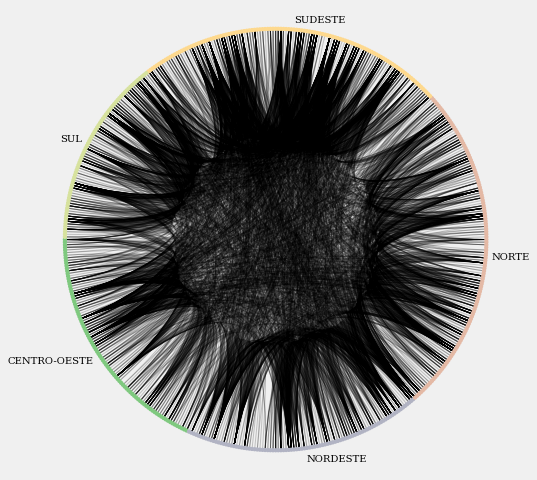

In [17]:
# Create a Circos Plot
c = nv.CircosPlot(G_brazil,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8))

# Draw c to the screen
c.draw()

# If there is a continuous datatype for the nodes, 
# it will be reflected in self.sm being constructed
# It will then automatically add in a colorbar 
# to the plot and scale the plot axes accordingly
# we need remove the colobar in this case
# c.sm.colorbar.remove()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

In [18]:
# mixing matrix
# dimension of this matrix is proportional to number of groups
nx.attribute_mixing_matrix(G_brazil,'region')

array([[0.17309397, 0.05474291, 0.04022606, 0.03402039, 0.02759309],
       [0.05474291, 0.0802305 , 0.01340869, 0.0106383 , 0.0206117 ],
       [0.04022606, 0.01340869, 0.07158688, 0.01285461, 0.0070922 ],
       [0.03402039, 0.0106383 , 0.01285461, 0.05385638, 0.02293883],
       [0.02759309, 0.0206117 , 0.0070922 , 0.02293883, 0.13297872]])

In [19]:
# view the order of columns in the mix matrix
set([G_brazil.nodes[node]['region'] for node in G_brazil.nodes()])

{'CENTRO-OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'}

Once we know what each column of the matrix is, we can extract some insights. For example, we can see that North (NORTHEAST) and South-East (SOUTHEAST) are the regions with the highest percentage of connection with themselves. If you take a look at [IPEA (2009)](https://www.ipea.gov.br/presenca/index.php?option=com_content&view=article&id=26&Itemid=19), you will see that the North region has fewer highways than the other regions. So we can infer that airports there are more used for travel between some states or some cities. Thus, in other regions with more highways, road transport may be used more than air transport, causing the percentage of airport connections in these regions to be lower.

**Assortativity coeffiecient**
  
  - $-1 < x <0$ -> The network is disassortativity
  - $0 \leq x <1$ -> The network is assortativity

In [20]:
# assortativity coefficient
nx.attribute_assortativity_coefficient(G_brazil,"region")

0.3702566964904414

Thus, the associative coefficient shows us that this network is assortative, that is, nodes of a group tend to interact with other nodes of the same group.

## ANALYSIS 2 - DEGREE VS N-NEIGHBORS

In an assortative network, high-degree nodes tend to connect with other high-degree nodes. On the other hand, in a dissortative network, nodes with high degree tend to connect with nodes with low degree.

In [21]:
# function to get subgraphs by region
def subgraph_by_region(G, region):
  g = []
  for node in G.nodes():
    if G.nodes[node]['region'] == region:
      g.append(node)

  return G.subgraph(g)

In [22]:
# getting subgraphs by region
G_northeast = subgraph_by_region(G_brazil, "NORDESTE")
G_north = subgraph_by_region(G_brazil, "NORTE")
G_midwest = subgraph_by_region(G_brazil, "CENTRO-OESTE")
G_southeast = subgraph_by_region(G_brazil, "SUDESTE")
G_south = subgraph_by_region(G_brazil, "SUL")

In [23]:
# average degree of neighbors
degree_brazil, avg_neigh_degree_brazil = zip(*nx.average_degree_connectivity(G_brazil).items()) # brazil
degree_northeast, avg_neigh_degree_northeast = zip(*nx.average_degree_connectivity(G_northeast).items()) # northeast
degree_north, avg_neigh_degree_north = zip(*nx.average_degree_connectivity(G_north).items()) # north
degree_midwest, avg_neigh_degree_midwest = zip(*nx.average_degree_connectivity(G_midwest).items()) # midwest
degree_southeast, avg_neigh_degree_southeast = zip(*nx.average_degree_connectivity(G_southeast).items()) # southeast
degree_south, avg_neigh_degree_south = zip(*nx.average_degree_connectivity(G_south).items()) # south

# convert to list
# Brazil
degree_brazil = list(degree_brazil)
avg_neigh_degree_brazil = list(avg_neigh_degree_brazil)

# Northeast region
degree_northeast = list(degree_northeast)
avg_neigh_degree_northeast = list(avg_neigh_degree_northeast)

# North region
degree_north = list(degree_north)
avg_neigh_degree_north = list(avg_neigh_degree_north)

# Midwest region
degree_midwest = list(degree_midwest)
avg_neigh_degree_midwest = list(avg_neigh_degree_midwest)

# South region
degree_southeast = list(degree_southeast)
avg_neigh_degree_southeast = list(avg_neigh_degree_southeast)

# Southeast region
degree_south = list(degree_south)
avg_neigh_degree_south = list(avg_neigh_degree_south)

In [24]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_brazil).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


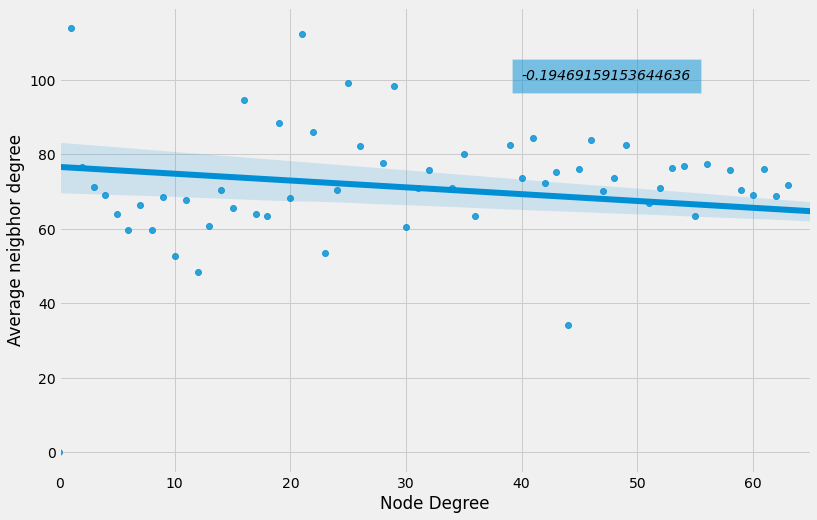

In [25]:
# bivariate analysis graph for Brazil
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_brazil,avg_neigh_degree_brazil,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.text(40, 100, str(nx.degree_assortativity_coefficient(G_brazil)), style='italic',
        bbox={'facecolor': '#008Fd5', 'alpha': 0.5, 'pad': 10})
ax.set_xlim(0,65)

plt.show()

The graph above shows that as the node degree increases, the neighbor's average degree decreases. This shows us that the network tends to be disassortative with respect to degree. In particular, the South, Southeast and Center-West have greater disassortatives in terms of degree. This could mean that these regions connect more with other regions than others.

Degree assortativity for Brazil = -0.1947

Degree assortativity for North = -0.2201

Degree assortativity for Northeast = -0.3174

Degree assortativity for South = -0.3542

Degree assortativity for Southeast = -0.3629

Degree assortativity for Midwest = -0.3499



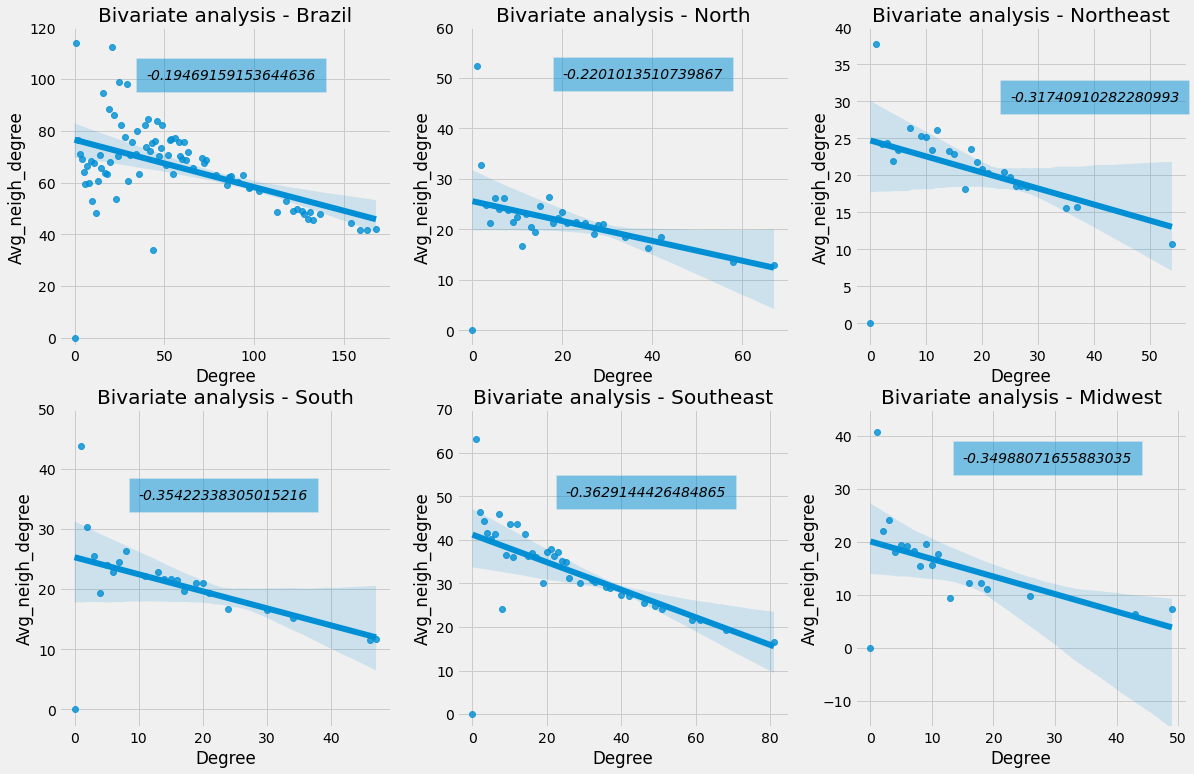

In [78]:
# bivariate analysis graph for Brazil and regions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

list_names = ['Brazil', 'North', 'Northeast', 'South', 'Southeast', 'Midwest']
list_nodes = [G_brazil, G_north, G_northeast, G_south, G_southeast, G_midwest]
list_limits= [[-3,120], [-3,60], [-3,40], [-3,50], [-3,70], [-15,45]]
list_positions = [[40,100],[20,50],[25,30],[10,35],[25,50],[15,35]]

row=0
col=0
for i in range(6):
  if i == 3:
    row=1
    col=0
  degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(list_nodes[i]).items())
  coef = round(nx.degree_assortativity_coefficient(list_nodes[i]), 4)
  print(f'Degree assortativity for {list_names[i]} = {coef}\n')
  dic = { 'Degree': degree, 'Avg_neigh_degree': avg_neigh_degree }
  data = pd.DataFrame(dic)
  plot = sns.regplot(ax=axes[row, col], data=data, x='Degree', y='Avg_neigh_degree').set(title=f'Bivariate analysis - {list_names[i]}')
  axes[row, col].set_ylim(list_limits[i][0],list_limits[i][1])
  axes[row, col].text(list_positions[i][0], list_positions[i][1], str(nx.degree_assortativity_coefficient(list_nodes[i])), style='italic',
        bbox={'facecolor': '#008Fd5', 'alpha': 0.5, 'pad': 10})
  col += 1

  if i == 5:
    # Save figure
    plt.savefig("degree_assortativity_all.png", 
                format="png",
                dpi=400, 
                bbox_inches="tight",
                transparent=True)

    plt.show()


As we can see in the image above, the regions of Brazil tend to follow the same behavior as the country: the networks of the regions tend to be disassortative in relation to the degree.

In [ ]:
nx.degree_assortativity_coefficient(G_brazil)

-0.19469159153644636

The coefficient above confirms that the network is disassortative in relation to degree as we saw in the graph. Thus, regions of Brazil with a high degree, such as the Southeast, for example, tend to connect with other regions of lower degree.

## ANALYSIS 3 - CONNECTED COMPONENTS

Connected components are subgraphs whose can be reached from one another by following the edges of the network.

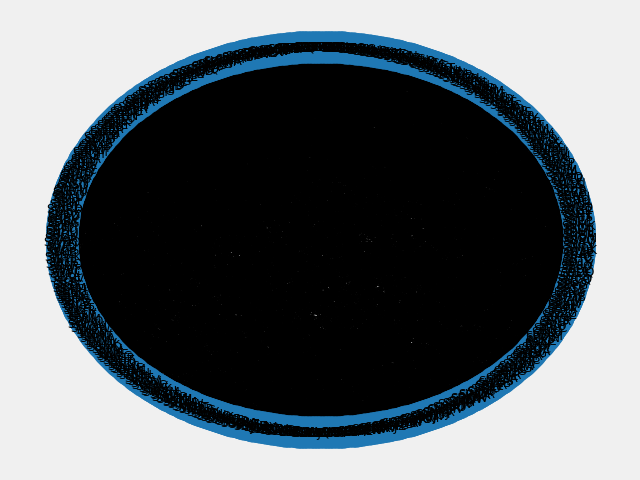

In [ ]:
# draw the Brazil's graph
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_brazil, ax=ax,node_size=1000,pos=nx.circular_layout(G_brazil))
plt.axis("off")
plt.show()

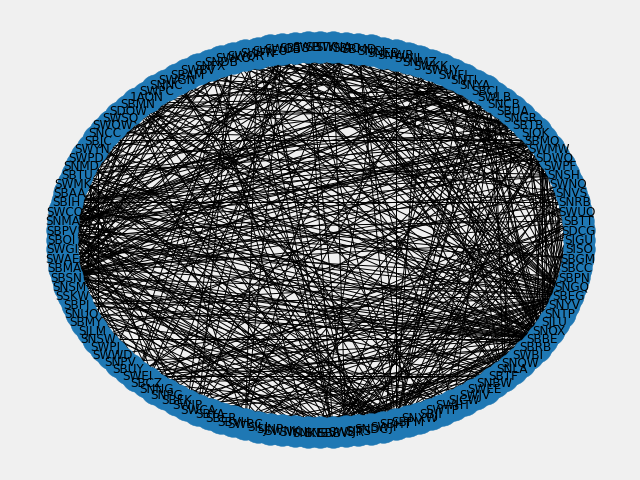

In [29]:
# draw the North's graph
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_north, ax=ax,node_size=1000,pos=nx.circular_layout(G_north))
plt.axis("off")
plt.show()

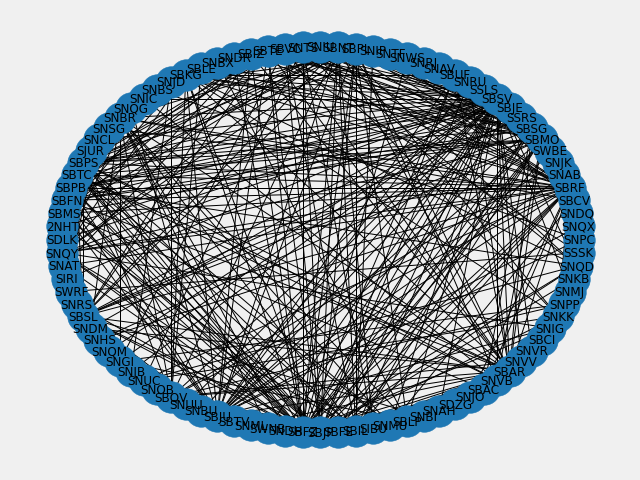

In [32]:
# draw the Northeast's graph
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_northeast, ax=ax,node_size=1000,pos=nx.circular_layout(G_northeast))
plt.axis("off")
plt.show()

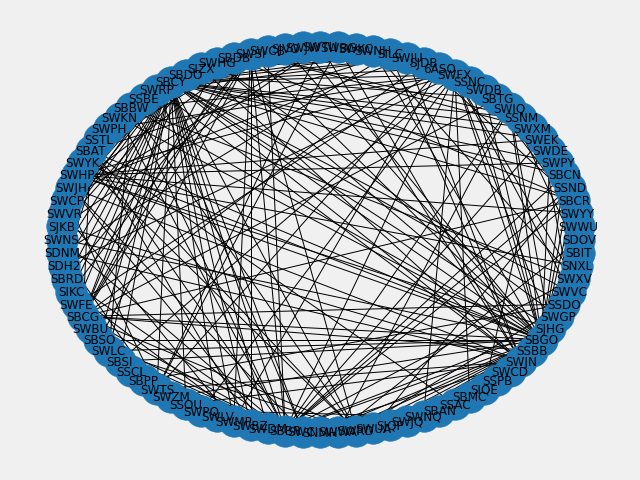

In [33]:
# draw the Midwest's graph
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_midwest, ax=ax,node_size=1000,pos=nx.circular_layout(G_midwest))
plt.axis("off")
plt.show()

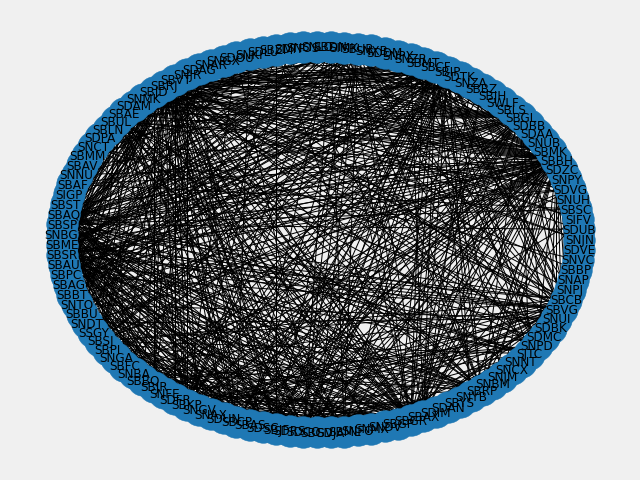

In [34]:
# draw the Southest's graph
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_southeast, ax=ax,node_size=1000,pos=nx.circular_layout(G_southeast))
plt.axis("off")
plt.show()

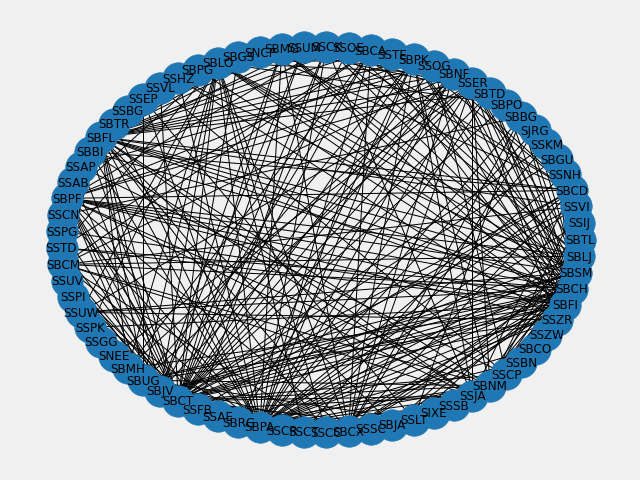

In [35]:
# draw the South's graph
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G_south, ax=ax,node_size=1000,pos=nx.circular_layout(G_south))
plt.axis("off")
plt.show()

In [36]:
# is_connected is applied only to undirected graph
nx.is_connected(nx.Graph(G_brazil))

False

In [37]:
# how many connected components has G?
nx.number_connected_components(G_brazil)

6

In [38]:
def component_information(component):
  N = 0
  NE = 0
  CO = 0
  SE = 0
  S = 0
  for node in component:
    region = G_brazil.nodes[node]['region']
    if region == "NORTE":
      N += 1
    elif region == "NORDESTE":
      NE += 1
    elif region == "CENTRO-OESTE":
      CO += 1
    elif region == "SUDESTE":
      SE += 1
    else:
      S += 1 
    
  t = N + NE + CO + SE + S
  print("Quantidade de componentes connectados por região: \n")
  print(f"NORTE: {N} \nNORDESTE: {NE} \nCENTRO-OESTE: {CO} \nSUDESTE: {SE} \nSUL:{S}\n")
  print("Quantidade da porcentagem de componentes connectados por região: \n")
  print(f"NORTE: {N*100/t}% \nNORDESTE: {NE*100/t}% \nCENTRO-OESTE: {CO*100/t}% \nSUDESTE: {SE*100/t}% \nSUL:{S*100/t}% \n")
  print("--------------------------------")

In [39]:
# interact under all connected component of G
for component in nx.connected_components(G_brazil):
  component_information(component)

Quantidade de componentes connectados por região: 

NORTE: 126 
NORDESTE: 92 
CENTRO-OESTE: 91 
SUDESTE: 117 
SUL:73

Quantidade da porcentagem de componentes connectados por região: 

NORTE: 25.250501002004007% 
NORDESTE: 18.43687374749499% 
CENTRO-OESTE: 18.236472945891784% 
SUDESTE: 23.44689378757515% 
SUL:14.629258517034069% 

--------------------------------
Quantidade de componentes connectados por região: 

NORTE: 0 
NORDESTE: 0 
CENTRO-OESTE: 0 
SUDESTE: 1 
SUL:0

Quantidade da porcentagem de componentes connectados por região: 

NORTE: 0.0% 
NORDESTE: 0.0% 
CENTRO-OESTE: 0.0% 
SUDESTE: 100.0% 
SUL:0.0% 

--------------------------------
Quantidade de componentes connectados por região: 

NORTE: 0 
NORDESTE: 0 
CENTRO-OESTE: 0 
SUDESTE: 1 
SUL:0

Quantidade da porcentagem de componentes connectados por região: 

NORTE: 0.0% 
NORDESTE: 0.0% 
CENTRO-OESTE: 0.0% 
SUDESTE: 100.0% 
SUL:0.0% 

--------------------------------
Quantidade de componentes connectados por região: 

NORTE:

Since we can see in the output of cell above, some components have just one node. Let's explore these cases.

In [40]:
# getting connected components
component = list(nx.connected_components(G_brazil))
component

[{'1AON',
  '2NHT',
  '6ASO',
  'SBAA',
  'SBAC',
  'SBAE',
  'SBAF',
  'SBAG',
  'SBAM',
  'SBAN',
  'SBAQ',
  'SBAR',
  'SBAS',
  'SBAT',
  'SBAU',
  'SBAV',
  'SBAX',
  'SBBE',
  'SBBG',
  'SBBH',
  'SBBI',
  'SBBP',
  'SBBQ',
  'SBBR',
  'SBBT',
  'SBBU',
  'SBBV',
  'SBBW',
  'SBBZ',
  'SBCA',
  'SBCB',
  'SBCC',
  'SBCD',
  'SBCF',
  'SBCG',
  'SBCH',
  'SBCI',
  'SBCJ',
  'SBCM',
  'SBCN',
  'SBCO',
  'SBCP',
  'SBCR',
  'SBCT',
  'SBCV',
  'SBCX',
  'SBCY',
  'SBCZ',
  'SBDB',
  'SBDN',
  'SBDO',
  'SBEG',
  'SBEK',
  'SBFC',
  'SBFE',
  'SBFI',
  'SBFL',
  'SBFN',
  'SBFZ',
  'SBGL',
  'SBGM',
  'SBGO',
  'SBGP',
  'SBGR',
  'SBGS',
  'SBGU',
  'SBGV',
  'SBHT',
  'SBIC',
  'SBIH',
  'SBIL',
  'SBIP',
  'SBIT',
  'SBIZ',
  'SBJA',
  'SBJC',
  'SBJD',
  'SBJE',
  'SBJF',
  'SBJI',
  'SBJP',
  'SBJR',
  'SBJU',
  'SBJV',
  'SBKG',
  'SBKP',
  'SBLE',
  'SBLJ',
  'SBLN',
  'SBLO',
  'SBLP',
  'SBLS',
  'SBMA',
  'SBMC',
  'SBMD',
  'SBME',
  'SBMG',
  'SBMH',
  'SBMK',
  'SBML',


In [41]:
# component[1]
G_brazil.nodes['SNBG']

{'name': 'BAIXO GUANDU',
 'country': 'BRASIL',
 'region': 'SUDESTE',
 'latitude': -19.499000549316406,
 'longitude': -41.04180145263672}

In [42]:
# component[2]
G_brazil.nodes['SBJH']

{'name': 'SÃO ROQUE',
 'country': 'BRASIL',
 'region': 'SUDESTE',
 'latitude': -23.426886,
 'longitude': -47.165658}

In [43]:
# component[3]
G_brazil.nodes['SBER']

{'name': 'EIRUNEPÉ',
 'country': 'BRASIL',
 'region': 'NORTE',
 'latitude': -6.663039999999967,
 'longitude': -69.86730999999997}

In [44]:
# component[4]
G_brazil.nodes['SSBE']

{'name': 'CAMAPUÃ',
 'country': 'BRASIL',
 'region': 'CENTRO-OESTE',
 'latitude': -19.5984001159668,
 'longitude': -54.02109909057617}

In [45]:
# component[5]
G_brazil.nodes['SNGR']

{'name': 'CUMARU DO NORTE',
 'country': 'BRASIL',
 'region': 'NORTE',
 'latitude': -7.783610820770264,
 'longitude': -51.133888244628906}

After a little research on the Internet, these cities above are relatively small (less than 100,000 inhabitants). Therefore, they may have a harder time connecting flights to other cities, due to their economies and sizes.

## ANALYSIS 4 - SHORTEST PATH

Shortest path is defined as the minimum number of links that must be traversed in a path connecting the two nodes.

In [46]:
G_brazil.nodes(data=True)

NodeDataView({'SBEG': {'name': 'MANAUS', 'country': 'BRASIL', 'region': 'NORTE', 'latitude': -3.03861, 'longitude': -60.049702}, 'SNQM': {'name': 'QUEIMADAS', 'country': 'BRASIL', 'region': 'NORDESTE', 'latitude': -10.988332748413086, 'longitude': -39.62055587768555}, 'SNBR': {'name': 'BARREIRAS', 'country': 'BRASIL', 'region': 'NORDESTE', 'latitude': -12.078900337219238, 'longitude': -45.00899887084961}, 'SBML': {'name': 'MARÍLIA', 'country': 'BRASIL', 'region': 'SUDESTE', 'latitude': -22.1968994141, 'longitude': -49.926399231}, 'SNMJ': {'name': 'MARACÁS', 'country': 'BRASIL', 'region': 'NORDESTE', 'latitude': -13.4333000183, 'longitude': -40.4333000183}, 'SBCC': {'name': 'NOVO PROGRESSO', 'country': 'BRASIL', 'region': 'NORTE', 'latitude': -9.33393955231, 'longitude': -54.9654006958}, 'SNMK': {'name': 'JAÍBA', 'country': 'BRASIL', 'region': 'SUDESTE', 'latitude': -15.093000411987305, 'longitude': -43.97909927368164}, 'SNIC': {'name': 'IRECÊ', 'country': 'BRASIL', 'region': 'NORDESTE'

In [47]:
destination = {
    'region_norte': 'SBEG',         # MANAUS
    'region_nordeste': 'SNBR',      # BARREIRAS
    'region_sul': 'SBJA',           # JAGUARUNA
    'region_sudeste': 'SIMK',       # FRANCA
    'region_centro_oeste': 'SBTG'   # TRÊS LAGOAS
}

In [48]:
path1 = nx.shortest_path(G_brazil, destination['region_norte'], destination['region_sul'])
print(path1)
print(f"{G_brazil.nodes[path1[0]]['name']} -> {G_brazil.nodes[path1[1]]['name']} -> {G_brazil.nodes[path1[2]]['name']}")

['SBEG', 'SBSV', 'SBJA']
MANAUS -> SALVADOR -> JAGUARUNA


In [49]:
path2 = nx.shortest_path(G_brazil, destination['region_sul'], destination['region_nordeste'])
print(path2)
print(f"{G_brazil.nodes[path2[0]]['name']} -> {G_brazil.nodes[path2[1]]['name']} -> {G_brazil.nodes[path2[2]]['name']}")

['SBJA', 'SBBR', 'SNBR']
JAGUARUNA -> BRASÍLIA -> BARREIRAS


In [50]:
path3 = nx.shortest_path(G_brazil, destination['region_nordeste'], destination['region_centro_oeste'])
print(path3)
print(f"{G_brazil.nodes[path3[0]]['name']} -> {G_brazil.nodes[path3[1]]['name']} -> {G_brazil.nodes[path3[2]]['name']}")

['SNBR', 'SBRJ', 'SBTG']
BARREIRAS -> RIO DE JANEIRO -> TRÊS LAGOAS


In [51]:
path4 = nx.shortest_path(G_brazil, destination['region_centro_oeste'], destination['region_sudeste'])
print(path4)
print(f"{G_brazil.nodes[path4[0]]['name']} -> {G_brazil.nodes[path4[1]]['name']} -> {G_brazil.nodes[path4[2]]['name']}")

['SBTG', 'SBGR', 'SIMK']
TRÊS LAGOAS -> GUARULHOS -> FRANCA


Thus, in each walk, 2 paths were performed, totaling 8 paths.

In [52]:
# Checking the amount of travel from the starting point to the destination point
path = nx.shortest_path(G_brazil, destination['region_norte'], destination['region_sudeste'])
print(path)
print(f"{G_brazil.nodes[path[0]]['name']} -> {G_brazil.nodes[path[1]]['name']} -> {G_brazil.nodes[path[2]]['name']}")

['SBEG', 'SBBR', 'SIMK']
MANAUS -> BRASÍLIA -> FRANCA


In [53]:
# G_brazil is a tree?
nx.is_tree(G_brazil)

False

In [54]:
# G_brazil has cycles?
nx.cycle_basis(G_brazil)

[['SBCT', 'SBCM', 'SSVI'],
 ['SBRJ', 'SBCM', 'SSVI'],
 ['SBSP', 'SBCM', 'SSVI'],
 ['SBPA', 'SBCM', 'SSVI'],
 ['SBKP', 'SBCM', 'SSVI'],
 ['SBCH', 'SBCM', 'SSVI'],
 ['SBFL', 'SBCM', 'SSVI'],
 ['SBNM', 'SBCM', 'SSVI'],
 ['SBGR', 'SBCM', 'SSVI'],
 ['SBSV', 'SWKN', 'SBCM'],
 ['SBCT', 'SWKN', 'SBCM'],
 ['SBRJ', 'SWKN', 'SBCM'],
 ['SBSP', 'SWKN', 'SBCM'],
 ['SBPA', 'SWKN', 'SBCM'],
 ['SBCF', 'SWKN', 'SBCM'],
 ['SBKP', 'SWKN', 'SBCM'],
 ['SBBR', 'SWKN', 'SBCM'],
 ['SBBH', 'SWKN', 'SBCM'],
 ['SBVT', 'SWKN', 'SBCM'],
 ['SBGL', 'SWKN', 'SBCM'],
 ['SBRP', 'SWKN', 'SBCM'],
 ['SBGR', 'SWKN', 'SBCM'],
 ['SBNT', 'SBCX', 'SWKN'],
 ['SBFI', 'SBCX', 'SWKN'],
 ['SBSV', 'SBCX', 'SWKN'],
 ['SBSM', 'SBCX', 'SWKN', 'SBCM', 'SSVI'],
 ['SBCT', 'SBCX', 'SWKN'],
 ['SBRJ', 'SBCX', 'SWKN'],
 ['SBJV', 'SBCX', 'SWKN', 'SBCM'],
 ['SBSP', 'SBCX', 'SWKN'],
 ['SBNF', 'SBCX', 'SWKN', 'SBCM'],
 ['SBPA', 'SBCX', 'SWKN'],
 ['SBCA', 'SBCX', 'SWKN', 'SBCM'],
 ['SBCF', 'SBCX', 'SWKN'],
 ['SBKP', 'SBCX', 'SWKN'],
 ['SBPS', 'SBCX

In [55]:
# how many cycles do we have?
len(nx.cycle_basis(G_brazil))

4014

We cannot average the length of the shortest path because it is not a connected graph.

## ANALYSIS 5 - CLUSTERING COEFFICIENT

The clustering coefficient is the fraction of possible traingles that contain the ego

In [56]:
nx.triangles(G_brazil)

{'SBEG': 1800,
 'SNQM': 0,
 'SNBR': 337,
 'SBML': 645,
 'SNMJ': 0,
 'SBCC': 3,
 'SNMK': 13,
 'SNIC': 1,
 'SSEP': 3,
 'SNTF': 52,
 'SBNT': 1540,
 'SNTI': 100,
 'SBGP': 28,
 '2NHT': 15,
 'SNDQ': 0,
 'SSNH': 1,
 'SBFI': 1336,
 'SBBQ': 17,
 'SNNU': 4,
 'SBAC': 9,
 'SBRB': 789,
 'SDUB': 6,
 'SJUR': 14,
 'SBGS': 3,
 'SWEU': 11,
 'SBSV': 2286,
 'SWTP': 9,
 'SDWQ': 21,
 'SNBI': 1,
 'SNLA': 3,
 'SBSM': 199,
 'SIMK': 137,
 'SWSI': 321,
 'SWCP': 3,
 'SBYS': 1,
 'SJDB': 15,
 'SSOU': 8,
 'SBGV': 299,
 'SWBU': 1,
 'SNMH': 1,
 'SNBG': 0,
 'SNMX': 10,
 'SBAS': 152,
 'SNQX': 0,
 'SNFO': 0,
 'SDRS': 17,
 'SDUN': 14,
 'SWYY': 0,
 'SWUI': 1,
 'SNSM': 0,
 'SWFJ': 3,
 'SBCT': 2107,
 'SBRJ': 2225,
 'SBRG': 42,
 'SWEI': 52,
 'SWUY': 38,
 'SNRB': 10,
 'SSVL': 4,
 'SWNS': 7,
 'SNKB': 1,
 'SBJD': 633,
 'SBJA': 108,
 'SDSC': 890,
 'SILJ': 0,
 'SBMS': 115,
 'SNAX': 1,
 'SNMD': 11,
 'SNIG': 2,
 'SBLJ': 101,
 'SBVG': 286,
 'SBPI': 0,
 'SWDM': 2,
 'SBPP': 36,
 'SWIQ': 17,
 'SSTL': 6,
 'SWJN': 43,
 'SDCG': 14,
 'SWFN'

In [57]:
nx.clustering(G_brazil)

{'SBEG': 0.22145669291338582,
 'SNQM': 0,
 'SNBR': 0.6007130124777184,
 'SBML': 0.7865853658536586,
 'SNMJ': 0,
 'SBCC': 1.0,
 'SNMK': 0.6190476190476191,
 'SNIC': 1.0,
 'SSEP': 1.0,
 'SNTF': 0.7878787878787878,
 'SBNT': 0.49983771502758845,
 'SNTI': 0.6535947712418301,
 'SBGP': 1.0,
 '2NHT': 1.0,
 'SNDQ': 0,
 'SSNH': 1.0,
 'SBFI': 0.5226917057902973,
 'SBBQ': 0.8095238095238095,
 'SNNU': 0.6666666666666666,
 'SBAC': 0.9,
 'SBRB': 0.5725689404934688,
 'SDUB': 1.0,
 'SJUR': 0.9333333333333333,
 'SBGS': 1.0,
 'SWEU': 0.7333333333333333,
 'SBSV': 0.2684674104521433,
 'SWTP': 0.9,
 'SDWQ': 1.0,
 'SNBI': 1.0,
 'SNLA': 1.0,
 'SBSM': 0.4574712643678161,
 'SIMK': 0.8954248366013072,
 'SWSI': 0.4115384615384615,
 'SWCP': 1.0,
 'SBYS': 1.0,
 'SJDB': 1.0,
 'SSOU': 0.5333333333333333,
 'SBGV': 0.6430107526881721,
 'SWBU': 1.0,
 'SNMH': 1.0,
 'SNBG': 0,
 'SNMX': 1.0,
 'SBAS': 0.9934640522875817,
 'SNQX': 0,
 'SNFO': 0,
 'SDRS': 0.8095238095238095,
 'SDUN': 0.6666666666666666,
 'SWYY': 0,
 'SWUI': 1

In [58]:
nx.average_clustering(G_brazil)

0.6300734480826977

### Northeast

In [59]:
nodes = (
    node
    for node, data
    in G_brazil.nodes(data=True)
    if data.get("region") == "NORDESTE"
)
subgraph_nordeste = G_brazil.subgraph(nodes)
subgraph_nordeste.nodes 

NodeView(('SNPC', 'SNQX', 'SNDQ', 'SBCV', 'SBRF', 'SNAB', 'SNJK', 'SWBE', 'SBMO', 'SBSG', 'SSRS', 'SBJE', 'SBSV', 'SSLS', 'SNRU', 'SBUF', 'SNAV', 'SNRJ', 'SNWS', 'SNTF', 'SNIP', 'SBPL', 'SBNT', 'SNIU', 'SNTS', 'SBVC', 'SBTE', 'SBIZ', 'SNDR', 'SNBX', 'SBLE', 'SBKG', 'SNJD', 'SNBS', 'SNIC', 'SNQG', 'SNBR', 'SNSG', 'SNCL', 'SJUR', 'SBPS', 'SBTC', 'SBPB', 'SBFN', 'SBMS', '2NHT', 'SDLK', 'SNQY', 'SNAT', 'SIRI', 'SWRF', 'SNRS', 'SBSL', 'SNDM', 'SNHS', 'SNQM', 'SNGI', 'SNJB', 'SNUC', 'SNOB', 'SBQV', 'SNUU', 'SNBU', 'SBJU', 'SBTV', 'SNML', 'SWNB', 'SNDH', 'SBFZ', 'SBJP', 'SBFE', 'SBIL', 'SIBU', 'SNMU', 'SBLP', 'SNBI', 'SNAH', 'SDZG', 'SNJO', 'SBAC', 'SNVB', 'SBAR', 'SNVV', 'SNVR', 'SBCI', 'SNIG', 'SNKK', 'SNPP', 'SNMJ', 'SNKB', 'SNQD', 'SSSK'))

In [60]:
nx.triangles(subgraph_nordeste)

{'SNPC': 0,
 'SNQX': 0,
 'SNDQ': 0,
 'SBCV': 4,
 'SBRF': 229,
 'SNAB': 0,
 'SNJK': 0,
 'SWBE': 0,
 'SBMO': 178,
 'SBSG': 112,
 'SSRS': 2,
 'SBJE': 34,
 'SBSV': 230,
 'SSLS': 0,
 'SNRU': 36,
 'SBUF': 45,
 'SNAV': 0,
 'SNRJ': 0,
 'SNWS': 0,
 'SNTF': 5,
 'SNIP': 1,
 'SBPL': 158,
 'SBNT': 177,
 'SNIU': 0,
 'SNTS': 30,
 'SBVC': 28,
 'SBTE': 97,
 'SBIZ': 75,
 'SNDR': 1,
 'SNBX': 0,
 'SBLE': 18,
 'SBKG': 111,
 'SNJD': 3,
 'SNBS': 0,
 'SNIC': 1,
 'SNQG': 1,
 'SNBR': 51,
 'SNSG': 0,
 'SNCL': 1,
 'SJUR': 0,
 'SBPS': 151,
 'SBTC': 50,
 'SBPB': 63,
 'SBFN': 51,
 'SBMS': 37,
 '2NHT': 3,
 'SDLK': 0,
 'SNQY': 59,
 'SNAT': 8,
 'SIRI': 1,
 'SWRF': 0,
 'SNRS': 0,
 'SBSL': 115,
 'SNDM': 6,
 'SNHS': 1,
 'SNQM': 0,
 'SNGI': 5,
 'SNJB': 1,
 'SNUC': 6,
 'SNOB': 0,
 'SBQV': 59,
 'SNUU': 0,
 'SNBU': 0,
 'SBJU': 158,
 'SBTV': 0,
 'SNML': 0,
 'SWNB': 1,
 'SNDH': 1,
 'SBFZ': 197,
 'SBJP': 181,
 'SBFE': 10,
 'SBIL': 104,
 'SIBU': 3,
 'SNMU': 7,
 'SBLP': 5,
 'SNBI': 0,
 'SNAH': 0,
 'SDZG': 0,
 'SNJO': 1,
 'SBAC': 6

In [61]:
nx.clustering(subgraph_nordeste)

{'SNPC': 0,
 'SNQX': 0,
 'SNDQ': 0,
 'SBCV': 0.6666666666666666,
 'SBRF': 0.34384384384384387,
 'SNAB': 0,
 'SNJK': 0,
 'SWBE': 0,
 'SBMO': 0.4708994708994709,
 'SBSG': 0.7320261437908496,
 'SSRS': 0.6666666666666666,
 'SBJE': 0.9444444444444444,
 'SBSV': 0.1607267645003494,
 'SSLS': 0,
 'SNRU': 1.0,
 'SBUF': 1.0,
 'SNAV': 0,
 'SNRJ': 0,
 'SNWS': 0,
 'SNTF': 0.5,
 'SNIP': 1.0,
 'SBPL': 0.572463768115942,
 'SBNT': 0.5042735042735043,
 'SNIU': 0,
 'SNTS': 0.6666666666666666,
 'SBVC': 0.7777777777777778,
 'SBTE': 0.5672514619883041,
 'SBIZ': 0.7142857142857143,
 'SNDR': 1.0,
 'SNBX': 0,
 'SBLE': 0.8571428571428571,
 'SBKG': 0.6491228070175439,
 'SNJD': 0.5,
 'SNBS': 0,
 'SNIC': 1.0,
 'SNQG': 0.3333333333333333,
 'SNBR': 0.375,
 'SNSG': 0,
 'SNCL': 1.0,
 'SJUR': 0,
 'SBPS': 0.4646153846153846,
 'SBTC': 0.7575757575757576,
 'SBPB': 0.6923076923076923,
 'SBFN': 0.9272727272727272,
 'SBMS': 0.6727272727272727,
 '2NHT': 1.0,
 'SDLK': 0,
 'SNQY': 0.5619047619047619,
 'SNAT': 0.8,
 'SIRI': 1.0,


In [62]:
nx.average_clustering(subgraph_nordeste)

0.4719877188787716

### North

In [63]:
nodes = (
    node
    for node, data
    in G_brazil.nodes(data=True)
    if data.get("region") == "NORTE"
)
subgraph_norte = G_brazil.subgraph(nodes)
subgraph_norte.nodes 

NodeView(('SJGU', 'SDCG', 'SBTT', 'SWUQ', 'SNRB', 'SNVS', 'SWNO', 'SNSH', 'SWPF', 'SDWQ', 'SWMW', 'SBMQ', 'SJQK', 'SBTB', 'SNGR', 'SBUA', 'SNCB', 'SWLB', 'SBCJ', 'SNYA', 'SNTI', 'SWFJ', 'SWUY', 'SWKK', 'SNMZ', 'SWII', 'SNWR', 'SNEB', 'SNCI', 'SBMD', 'SBIC', 'SWNA', 'SBTK', 'SWPI', 'SBTS', 'SWOB', 'SWEU', 'SWFN', 'SWQR', 'SWKO', 'SNDB', 'SNFX', 'SWBV', 'SBAM', 'SWGN', 'SNNC', 'SWPC', '1AON', 'SBMN', 'SDOW', 'SWSQ', 'SWOW', 'SNCC', 'SBJC', 'SWYN', 'SWPD', 'SNMD', 'SBTU', 'SWMK', 'SBAA', 'SBIH', 'SWCQ', 'SNMA', 'SBPV', 'SBOI', 'SWGI', 'SWAE', 'SBMA', 'SBSN', 'SNSM', 'SSKW', 'SBPJ', 'SNUO', 'SBMY', 'SJLM', 'SNSW', 'SWPJ', 'SWWD', 'SNPV', 'SBUY', 'SWEI', 'SBCZ', 'SNNG', 'SNPG', 'SBEK', 'SWJP', 'SWCA', 'SBYA', 'SBER', 'SBVH', 'SWBC', 'SILJ', 'SJNP', 'SWNK', 'SWUI', 'SNKE', 'SNBV', 'SBBV', 'SWBR', 'SJTS', 'SNDC', 'SWJI', 'SBHT', 'SBPM', 'SNXW', 'SBJI', 'SWTP', 'SWHT', 'SJCW', 'SWJV', 'SWEE', 'SNBW', 'SBTF', 'SNLA', 'SNQW', 'SWBI', 'SBRB', 'SBBE', 'SNOX', 'SJLU', 'SNTP', 'SNYV', 'SBEG', 'SNGQ'

In [64]:
nx.clustering(subgraph_norte)

{'SJGU': 0,
 'SDCG': 0.9333333333333333,
 'SBTT': 0.48366013071895425,
 'SWUQ': 0.7,
 'SNRB': 0.6666666666666666,
 'SNVS': 0.7272727272727273,
 'SWNO': 0.42857142857142855,
 'SNSH': 0.49707602339181284,
 'SWPF': 0,
 'SDWQ': 1.0,
 'SWMW': 0.6363636363636364,
 'SBMQ': 0.3315508021390374,
 'SJQK': 0.4,
 'SBTB': 0.7132352941176471,
 'SNGR': 0,
 'SBUA': 0.4,
 'SNCB': 1.0,
 'SWLB': 0.6282051282051282,
 'SBCJ': 0.5842105263157895,
 'SNYA': 0.9333333333333333,
 'SNTI': 0.6911764705882353,
 'SWFJ': 1.0,
 'SWUY': 0.7857142857142857,
 'SWKK': 1.0,
 'SNMZ': 0.9111111111111111,
 'SWII': 1.0,
 'SNWR': 1.0,
 'SNEB': 0.6666666666666666,
 'SNCI': 0,
 'SBMD': 0.5751633986928104,
 'SBIC': 0.4642857142857143,
 'SWNA': 0.8,
 'SBTK': 0.8333333333333334,
 'SWPI': 0.5263157894736842,
 'SBTS': 0.6071428571428571,
 'SWOB': 0.6212121212121212,
 'SWEU': 0.7333333333333333,
 'SWFN': 0.29411764705882354,
 'SWQR': 0.8333333333333334,
 'SWKO': 0.42105263157894735,
 'SNDB': 1.0,
 'SNFX': 0.8333333333333334,
 'SWBV': 0

In [65]:
nx.average_clustering(subgraph_norte)

0.6134444520831853

### South

In [66]:
nodes = (
    node
    for node, data
    in G_brazil.nodes(data=True)
    if data.get("region") == "SUL"
)
subgraph_sul = G_brazil.subgraph(nodes)
subgraph_sul.nodes 

NodeView(('SBTL', 'SSIJ', 'SSVI', 'SBCD', 'SSNH', 'SBGU', 'SSKM', 'SJRG', 'SBBG', 'SBPO', 'SBTD', 'SSER', 'SBNF', 'SSOG', 'SBPK', 'SSTE', 'SBCA', 'SSOE', 'SSCK', 'SSUM', 'SBMG', 'SNCP', 'SBGS', 'SBLO', 'SBPG', 'SSHZ', 'SSVL', 'SSEP', 'SSBG', 'SBTR', 'SBFL', 'SBBI', 'SSAP', 'SSAB', 'SBPF', 'SSCN', 'SSPG', 'SSTD', 'SBCM', 'SSUV', 'SSPI', 'SSUW', 'SSPK', 'SSGG', 'SNEE', 'SBMH', 'SBUG', 'SBJV', 'SBCT', 'SSFB', 'SSAE', 'SBRG', 'SBPA', 'SSCR', 'SSCT', 'SSCC', 'SBCX', 'SSSC', 'SBJA', 'SSLT', 'SIXE', 'SSSB', 'SSJA', 'SBNM', 'SSCP', 'SSBN', 'SBCO', 'SSZW', 'SSZR', 'SBFI', 'SBCH', 'SBSM', 'SBLJ'))

In [67]:
nx.clustering(subgraph_sul)

{'SBTL': 0,
 'SSIJ': 1.0,
 'SSVI': 0.9523809523809523,
 'SBCD': 0.5367647058823529,
 'SSNH': 1.0,
 'SBGU': 1.0,
 'SSKM': 1.0,
 'SJRG': 1.0,
 'SBBG': 0.6190476190476191,
 'SBPO': 0.6,
 'SBTD': 0.8571428571428571,
 'SSER': 0.6691176470588235,
 'SBNF': 0.6916666666666667,
 'SSOG': 0.5333333333333333,
 'SBPK': 0.6198830409356725,
 'SSTE': 0,
 'SBCA': 0.6029411764705882,
 'SSOE': 0.6666666666666666,
 'SSCK': 0.8363636363636363,
 'SSUM': 0.6666666666666666,
 'SBMG': 0.8076923076923077,
 'SNCP': 0.6,
 'SBGS': 1.0,
 'SBLO': 0.4057971014492754,
 'SBPG': 0,
 'SSHZ': 1.0,
 'SSVL': 0.6666666666666666,
 'SSEP': 1.0,
 'SSBG': 0,
 'SBTR': 0,
 'SBFL': 0.4206896551724138,
 'SBBI': 0.7333333333333333,
 'SSAP': 0.8333333333333334,
 'SSAB': 0,
 'SBPF': 0.638095238095238,
 'SSCN': 1.0,
 'SSPG': 1.0,
 'SSTD': 1.0,
 'SBCM': 0.6538461538461539,
 'SSUV': 1.0,
 'SSPI': 0,
 'SSUW': 0.9285714285714286,
 'SSPK': 1.0,
 'SSGG': 0,
 'SNEE': 1.0,
 'SBMH': 1.0,
 'SBUG': 0.6761904761904762,
 'SBJV': 0.6916666666666667,


In [68]:
nx.average_clustering(subgraph_sul)

0.5969751301650297

### Southeast

In [69]:
nodes = (
    node
    for node, data
    in G_brazil.nodes(data=True)
    if data.get("region") == "SUDESTE"
)
subgraph_sudeste = G_brazil.subgraph(nodes)
subgraph_sudeste.nodes 

NodeView(('SNJN', 'SDUB', 'SIFV', 'SBSC', 'SNUH', 'SDVG', 'SNPY', 'SDZC', 'SBBH', 'SBMK', 'SNUB', 'SDAA', 'SDBB', 'SBGL', 'SBLS', 'SWLF', 'SBJH', 'SBBZ', 'SNZA', 'SDTK', 'SBIP', 'SBCF', 'SBMT', 'SNZR', 'SNPX', 'SDDM', 'SNXB', 'SBUR', 'SIMK', 'SBDN', 'SNLO', 'SNOS', 'SDTF', 'SBZM', 'SDLU', 'SNKI', 'SDOU', 'SNGX', 'SNAR', 'SDAG', 'SNJR', 'SBVT', 'SBRJ', 'SBJD', 'SNMK', 'SDAM', 'SBAE', 'SBUL', 'SBLN', 'SDPA', 'SNCT', 'SBMM', 'SBAV', 'SNNU', 'SBAF', 'SIGP', 'SBST', 'SBAQ', 'SBSP', 'SNBG', 'SBME', 'SBSR', 'SBAU', 'SBPC', 'SBAG', 'SBBT', 'SNTO', 'SBBU', 'SNDT', 'SSGY', 'SBSJ', 'SBPI', 'SNGA', 'SBFC', 'SNBA', 'SBBQ', 'SBJR', 'SNFE', 'SDFR', 'SBKP', 'SNGV', 'SNAX', 'SDUN', 'SBCP', 'SBAS', 'SDSC', 'SBJF', 'SDRS', 'SDCO', 'SBGV', 'SDJA', 'SBML', 'SNFO', 'SNMX', 'SNDV', 'SBGP', 'SBGR', 'SBAX', 'SDIM', 'SDAN', 'SBYS', 'SNYB', 'SBRP', 'SNBM', 'SNJM', 'SNCX', 'SNNT', 'SJTC', 'SNPD', 'SDMC', 'SDBK', 'SNUI', 'SBVG', 'SBCB', 'SNPJ', 'SNAP', 'SBBP', 'SNVC', 'SDVE'))

In [70]:
nx.clustering(subgraph_sudeste)

{'SNJN': 1.0,
 'SDUB': 1.0,
 'SIFV': 1.0,
 'SBSC': 0.8333333333333334,
 'SNUH': 1.0,
 'SDVG': 0.9555555555555556,
 'SNPY': 0.8333333333333334,
 'SDZC': 0,
 'SBBH': 0.17685185185185184,
 'SBMK': 0.7142857142857143,
 'SNUB': 0,
 'SDAA': 0.8,
 'SDBB': 0,
 'SBGL': 0.4005102040816326,
 'SBLS': 1.0,
 'SWLF': 0,
 'SBJH': 0,
 'SBBZ': 0.7582417582417582,
 'SNZA': 0.5,
 'SDTK': 0.7454545454545455,
 'SBIP': 0.5161290322580645,
 'SBCF': 0.41545893719806765,
 'SBMT': 0.6583333333333333,
 'SNZR': 0.9,
 'SNPX': 1.0,
 'SDDM': 0,
 'SNXB': 0,
 'SBUR': 0.5396825396825397,
 'SIMK': 0.9333333333333333,
 'SBDN': 0.72,
 'SNLO': 0,
 'SNOS': 0.6666666666666666,
 'SDTF': 0,
 'SBZM': 0.9560439560439561,
 'SDLU': 0,
 'SNKI': 1.0,
 'SDOU': 0.6,
 'SNGX': 1.0,
 'SNAR': 1.0,
 'SDAG': 0.780952380952381,
 'SNJR': 1.0,
 'SBVT': 0.4641025641025641,
 'SBRJ': 0.30040911747516075,
 'SBJD': 0.5,
 'SNMK': 0.8,
 'SDAM': 0.8916666666666667,
 'SBAE': 0.861904761904762,
 'SBUL': 0.5833333333333334,
 'SBLN': 0.6666666666666666,
 '

In [71]:
nx.average_clustering(subgraph_sudeste)

0.6052271473111241

### Midwest

In [72]:
nodes = (
    node
    for node, data
    in G_brazil.nodes(data=True)
    if data.get("region") == "CENTRO-OESTE"
)
subgraph_co = G_brazil.subgraph(nodes)
subgraph_co.nodes 

NodeView(('SDOV', 'SWWU', 'SWYY', 'SBCR', 'SSND', 'SBCN', 'SWPY', 'SWDE', 'SWEK', 'SWXM', 'SSNM', 'SWIQ', 'SBTG', 'SWDB', 'SSNC', 'SWFX', '6ASO', 'SJDB', 'SWJU', 'SILC', 'SWNH', 'SWKC', 'SWBG', 'SWTU', 'SWJW', 'SJVO', 'SWCB', 'SWSI', 'SBDB', 'SWHG', 'SIZX', 'SBDO', 'SBCY', 'SWRP', 'SSBE', 'SBBW', 'SWKN', 'SWPH', 'SSTL', 'SBAT', 'SWYK', 'SWHP', 'SWJH', 'SWCP', 'SWVR', 'SJKB', 'SWNS', 'SDNM', 'SDH2', 'SBRD', 'SIKC', 'SWFE', 'SBCG', 'SWBU', 'SBSO', 'SWLC', 'SBSI', 'SSCL', 'SBPP', 'SWTS', 'SWZM', 'SSOU', 'SWPQ', 'SWLV', 'SWMP', 'SWBZ', 'SWDM', 'SBBR', 'SWCI', 'SNMH', 'SWWA', 'SWRD', 'SWUA', 'SJQP', 'SWJQ', 'SWNQ', 'SBAN', 'SSAC', 'SBMC', 'SIQE', 'SSPB', 'SWCD', 'SWJN', 'SSBB', 'SBGO', 'SJHG', 'SWGP', 'SSDO', 'SWVC', 'SWXV', 'SNXL', 'SBIT'))

In [73]:
nx.clustering(subgraph_co)

{'SDOV': 1.0,
 'SWWU': 0,
 'SWYY': 0,
 'SBCR': 0.5238095238095238,
 'SSND': 1.0,
 'SBCN': 1.0,
 'SWPY': 1.0,
 'SWDE': 0,
 'SWEK': 0.42857142857142855,
 'SWXM': 1.0,
 'SSNM': 1.0,
 'SWIQ': 0.5333333333333333,
 'SBTG': 1.0,
 'SWDB': 0,
 'SSNC': 0,
 'SWFX': 0.3416666666666667,
 '6ASO': 0.5,
 'SJDB': 1.0,
 'SWJU': 0.8,
 'SILC': 0.5238095238095238,
 'SWNH': 1.0,
 'SWKC': 0,
 'SWBG': 1.0,
 'SWTU': 0.5,
 'SWJW': 0,
 'SJVO': 0,
 'SWCB': 0,
 'SWSI': 0.2549019607843137,
 'SBDB': 1.0,
 'SWHG': 0.6666666666666666,
 'SIZX': 0.6190476190476191,
 'SBDO': 1.0,
 'SBCY': 0.10714285714285714,
 'SWRP': 0.6785714285714286,
 'SSBE': 0,
 'SBBW': 0.6111111111111112,
 'SWKN': 1.0,
 'SWPH': 1.0,
 'SSTL': 0,
 'SBAT': 0.43636363636363634,
 'SWYK': 1.0,
 'SWHP': 0.35555555555555557,
 'SWJH': 0.4642857142857143,
 'SWCP': 1.0,
 'SWVR': 1.0,
 'SJKB': 0.9,
 'SWNS': 1.0,
 'SDNM': 0.8333333333333334,
 'SDH2': 0.7,
 'SBRD': 1.0,
 'SIKC': 1.0,
 'SWFE': 1.0,
 'SBCG': 0.24561403508771928,
 'SWBU': 0,
 'SBSO': 0.857142857142

In [74]:
nx.average_clustering(subgraph_co)

0.559094278519281

As we can see above, the region with the highest average clustering is the North, followed by the Southeast and South, respectively. In addition, the region with the lowest average clustering is the Northeast followed by the Midwest.

# References

- [Avaro's Github](https://github.com/alvarofpp/dataset-flights-brazil)

- [Ivanovitch Silva](https://github.com/ivanovitchm)

- [NetworkX](https://github.com/networkx/networkx)